#**Introdution to SymPy**
物理二 B10202064 傅學惟

Slides :\
https://docs.google.com/presentation/d/1cIfGMsOsn9iD5X1JbiIGxPFrMlNtvjS8/edit#slide=id.p1

# **Import SymPy**

In [ ]:
import sympy as sp

# **Define Symbols**

Use :
```
var = sp.symbols('var')
```

In [ ]:
x = sp.symbols('x')
y, z = sp.symbols('y z')
print(x,y,z)

x y z


# **Define & Evaluate Expression (Equation)**
Define expression :
```
# expr = ...
```

Define equation :
$$expr_1 = expr_2$$
```
eq = sp.Eq(expr1,expr2)
```
Evaluate (by substitution):
```
sp.subs(expr,x,val)
```
Evaluate (by lambdify function):
```
f = sp.lambdify(expr,x)\
f(val)
```

In [ ]:
# define expression
expr1 = x**2 + x + 1
expr2 = x*y + y + x

# define equation
eq1 = sp.Eq(x+y,5)  # x + y = 5
eq2 = sp.Eq(x**2+y**2,17) #x^2 + y^2 = 17

# evaluate expression (expr.subs)
print("x=1, y=2")
print(expr1, "=", expr1.subs(x,1)) # substitute x with 1
print(expr2, "=", expr2.subs([(x,1),(y,2)])) # expr2 with x=1, y=2

print(expr1.subs(x,y))  # substitute x with y

# evaluate expression (lambdify)
expr1 = sp.sqrt(sp.sin(x)*sp.cos(x))*sp.cosh(x)
expr1_f = sp.lambdify(x,expr1)  #create a numerical function base on the symbolic form
print(expr1_f(1))

x=1, y=2
x**2 + x + 1 = 3
x*y + x + y = 5
y**2 + y + 1
1.0404629123547238


#**Algebraric Equations**

## **I. Find Root**
Use : 
```
sp.solve(expr, real=bool, positive=bool)
```
example :\
(1)
$$(x_1-1)(x_1-2)(x_1-3) = 0$$
$$sol:x_1=1,2,3$$
(2)
$$x_2^4-1 = 0$$
$$sol:x_2=-1,1$$

In [ ]:
expr1 = (x-1)*(x-2)*(x-3)
root = sp.solve(expr1)
print(root)

#find real, positive roots
x = sp.symbols('x',real=True)
expr2 = x**4 - 1
root = sp.solve(expr2,real=True)
print(root)
x = sp.symbols('x')

[1, 2, 3]
[-1, 1]


## **II. Solve Simultaneous Equations**
Use : 

```
sp.solve([eqs], (vars))
```
example :
\begin{cases}
x+y=5\\
x^2+y^2=17
\end{cases}

In [ ]:
eq1 = sp.Eq(x+y,5) # x+y = 5
eq2 = sp.Eq(x**2+y**2,17) #x^2 + y^2 = 17
answer = sp.solve([eq1,eq2],(x,y))  #solve the coupled equation [eq1, eq2] by (x=...,y=...)
print(answer)

[(1, 4), (4, 1)]


## **III. More things about algebraic operation - 1**
To factorize a expression\
use :
```
expr.factor()
```
To expand a expression\
use : 
```
expr.expanding()
```

example :
$$y=x^2+4x+3$$
$$z=y^2$$
$$z.factor()=(x+1)^2(x+3)^2$$
$$z.expand()=x^4+8x^3+22x^2+24x+9$$

In [ ]:
y = x**2 + 4*x + 3
print(y)

z = y**2
print(z)

#factoring
print(z.factor())
#expanding
print(z.expand())

#And there's more things you can try, just press tab and check them out.

x**2 + 4*x + 3
(x**2 + 4*x + 3)**2
(x + 1)**2*(x + 3)**2
x**4 + 8*x**3 + 22*x**2 + 24*x + 9


## **IV. More things about algebraic operation - 2**
You can also solve the multivariable equation w.r.t certain variable.\
(eg : x=f(y,z))

In [ ]:
x, y, z = sp.symbols('x y z')
F = x**2 + sp.sin(z)*y
x_sol = sp.solve(F,x) # solve F w.r.t x
print("x =",x_sol)
y_sol = sp.solve(F,y) # solve F w.r.t y
print("y =",y_sol)
z_sol = sp.solve(F,z) # solve F w.r.t z
print("z =",z_sol)

x = [-sqrt(-y*sin(z)), sqrt(-y*sin(z))]
y = [-x**2/sin(z)]
z = [asin(x**2/y) + pi, -asin(x**2/y)]


# **Plot an Expression**
How can the symbolic expression interact with other modules?\
One way is to transform the expression into numerical function. (By : sp.lambdify(F, x))\
For example, if you want to plot the expression :

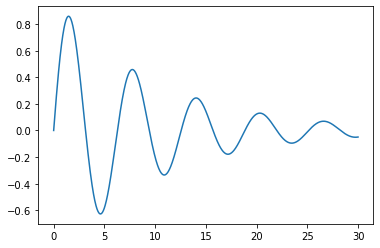

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
F = sp.sin(x)*sp.exp(-x/10)
F_f = sp.lambdify(x, F)
X = np.linspace(0,30,1000)
Y = F_f(X)
plt.plot(X,Y)
plt.show()

# **Calculus**

##**I. Limits**
$$lim_{ x\to val }f(x)$$
Use :

```
sp.limit(f(x),x,val)
```
For example :
$$lim_{ x\to \pi }sin(\frac{x}{2}+sin(x))$$

In [ ]:
x = sp.symbols('x')
sp.limit(sp.sin(x/2+sp.sin(x)),x,sp.pi)

1

##**II. Derivatives**
Use : sp.diff(f(x),x)\
for : $$\frac{\mathrm{d} }{\mathrm{d} x}f(x)$$
For example :
$$\frac{\mathrm{d} }{\mathrm{d} x}(\frac{1+sin(x)}{1-cos(x)})^2$$

In [ ]:
sp.diff(((1+sp.sin(x)) / (1-sp.cos(x)))**2, x)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

##**III. Integrals**
Use : sp.integrate(f(x),x)\
for : $$\int f(x) \mathrm{d}x$$
For example :
$$\int csc(x)cos(x) \mathrm{d}x$$

Use : sp.integrate(f(x),(x,a,b))\
for : $$\int_{a}^{b} f(x) \mathrm{d}x $$
For example :
$$\int_{1}^{\pi} \frac{e^x \mathrm{d}x}{\sqrt{e^{2x}+9}}$$

In [ ]:
sp.integrate(sp.csc(x)*sp.cos(x),x)

log(sin(x))

In [ ]:
sp.integrate(sp.exp(x)/sp.sqrt(sp.exp(2*x)+9),(x,0,sp.ln(4)))

-asinh(1/3) + asinh(4/3)

##**V. Differential Equations**
define arbitrary function f(x) :\
f = sp.Function('f')(x)

function Derivative :\
DE = sp.Derivative(f(x),x)

solve DE :\
sp.dsolve(expr, f(x))

example :\
$$\frac{\mathrm{d} ^2}{\mathrm{d} x^2} f(x) + 9f(x) = 0$$
$$Sol : f(x)=C_1sin(3x)+C_2cos(3x)$$

In [ ]:
f = sp.Function('f')(x)
func = sp.dsolve(sp.Derivative(f, x, x) + 9*f, f)
func

Eq(f(x), C1*sin(3*x) + C2*cos(3*x))

#**Multivariable**

##**Vector**

###**Define Vector**

Use :

```
sp.Matrix([v1,v2,...])
```



In [ ]:
v1, v2, v3 = sp.symbols('v1 v2 v3')
u1, u2, u3 = sp.symbols('u1 u2 u3')

v = sp.Matrix([v1, v2, v3])
u = sp.Matrix([u1, u2, u3])

###**Vector Addition and Multiplication**

In [ ]:
2*u+v

Matrix([
[2*u1 + v1],
[2*u2 + v2],
[2*u3 + v3]])

###**Dot Product & Cross Product**

In [ ]:
u.dot(v)

u1*v1 + u2*v2 + u3*v3

In [ ]:
u.cross(v)

Matrix([
[ u2*v3 - u3*v2],
[-u1*v3 + u3*v1],
[ u1*v2 - u2*v1]])

###**Norm**

In [ ]:
u.norm()

sqrt(Abs(u1)**2 + Abs(u2)**2 + Abs(u3)**2)

##**Vector Calculus**

###**Vector Derivatives**
Use :


```
v.diff(var)
```



In [ ]:
u, v = sp.symbols('u v')
r = sp.Matrix([u*sp.cos(v),u*sp.sin(v),u])
r

Matrix([
[u*cos(v)],
[u*sin(v)],
[       u]])

In [ ]:
r.diff(u).cross(r.diff(v))

Matrix([
[                -u*cos(v)],
[                -u*sin(v)],
[u*sin(v)**2 + u*cos(v)**2]])

###**Vector Integrals**
Use :


```
sp.Integral(v,var).doit()
```

In [ ]:
t = sp.symbols('t')
r = sp.Matrix([sp.exp(t)*sp.cos(t),t**4,1/(1+t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [ ]:
sp.Integral(r,t).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

###**Example (Calculus Early Transcendentals 9th 16.7 Exercises 15)**
$$\int \int _s x dS$$
*S* is the surface :
$$y = x^2 + 4z, 0\leq x \leq 1, 0 \leq z \leq 1$$

Sol :
$$\gamma (u, v) = (u, u^2+4v, v)$$
$$|\gamma_u \times \gamma_v| = \sqrt{17+4u^2}$$
$$\int \int u\sqrt{17+4u^2} dudv = -\frac{17\sqrt{17}}{12} + \frac{7\sqrt{21}}{4}$$

In [ ]:
r = sp.Matrix([u,u**2+4*v,v])
r

Matrix([
[         u],
[u**2 + 4*v],
[         v]])

In [ ]:
w = r.diff(u).cross(r.diff(v))
jacob = sp.sqrt(w.dot(w))
u*jacob

u*sqrt(4*u**2 + 17)

In [ ]:
I1 = sp.integrate(u*jacob,(u,0,1))
I2 = sp.integrate(I1,(v,0,1))
I2

-17*sqrt(17)/12 + 7*sqrt(21)/4

#**Example : Lagrangian Mechanics**
We define lagrangian as :
$$L=T(q,\dot{q})-U(q,\dot{q})$$
then, the equation of motion is :
$$\frac{\mathrm{d}L}{\mathrm{d}q}-\frac{\mathrm{d}}{\mathrm{d}t}\frac{\mathrm{d}L}{\mathrm{d}\dot{q}}=0$$

## **(Mechanics Hw.3 Problem 2)**
A disk of mass M and radius R slides without friction on a horizontal surface. Another disk of mass m and radius r is pinned through its center to a point off the center of the first disk by a distence b, so that it can rotate without friction on the first disk. Write down the Lagrangian function and derive the equation of motions.
![](https://drive.google.com/uc?export=view&id=1A4fclxd5gVrFn4_WEkO10zuQqroXLdee)

In [ ]:
b, M, R, m, r, t = sp.symbols('b M R m r t')
x, y, theta, phi = sp.Function('x')(t), sp.Function('y')(t), sp.Function('theta')(t), sp.Function('phi')(t)

x_dot = x.diff(t)
y_dot = y.diff(t)
theta_dot = theta.diff(t)
phi_dot = phi.diff(t)

x_m = x + b*sp.sin(theta)
x_m_dot = x_m.diff(t)
y_m = y + b*sp.cos(theta)
y_m_dot = y_m.diff(t)

In [ ]:
T = 1/2*m*(x_m_dot**2 + y_m_dot**2) + 1/2*M*(x_dot**2 + y_dot**2) + 1/4*M*R**2*theta_dot**2 + 1/4*m*r**2*phi_dot**2
U = 0

L = T - U
L

0.25*M*R**2*Derivative(theta(t), t)**2 + 0.5*M*(Derivative(x(t), t)**2 + Derivative(y(t), t)**2) + 0.25*m*r**2*Derivative(phi(t), t)**2 + 0.5*m*((-b*sin(theta(t))*Derivative(theta(t), t) + Derivative(y(t), t))**2 + (b*cos(theta(t))*Derivative(theta(t), t) + Derivative(x(t), t))**2)

In [ ]:
LE_x = L.diff(x) - L.diff(x_dot,t)
LE_y = L.diff(y) - L.diff(y_dot,t)
LE_theta = L.diff(theta) - L.diff(theta_dot,t)
LE_phi = L.diff(phi) - L.diff(phi_dot,t)

In [ ]:
sols = sp.solve([LE_x,LE_y,LE_phi,LE_theta],[sp.diff(x,t,t),sp.diff(y,t,t),sp.diff(theta,t,t),sp.diff(phi,t,t)])

In [ ]:
sols[sp.diff(x,t,t)]

b*m*sin(theta(t))*Derivative(theta(t), t)**2/(M + m)

In [ ]:
sols[sp.diff(y,t,t)]

b*m*cos(theta(t))*Derivative(theta(t), t)**2/(M + m)

In [ ]:
sols[sp.diff(theta,t,t)]

0.0

In [ ]:
sols[sp.diff(phi,t,t)]

0.0